<a href="https://colab.research.google.com/github/czapata-ande/ai-frameworks/blob/main/rpredicstarimaprofetcmetricdemespa_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘tensorA’, ‘distributional’, ‘TTR’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘quadprog’, ‘quantmod’, ‘inline’, ‘gridExtra’, ‘loo’, ‘QuickJSR’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘dygraphs’, ‘extraDistr’, ‘RcppParallel’, ‘rstan’, ‘rstantools’, ‘StanHeaders’, ‘xts’, ‘BH’, ‘RcppEigen’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



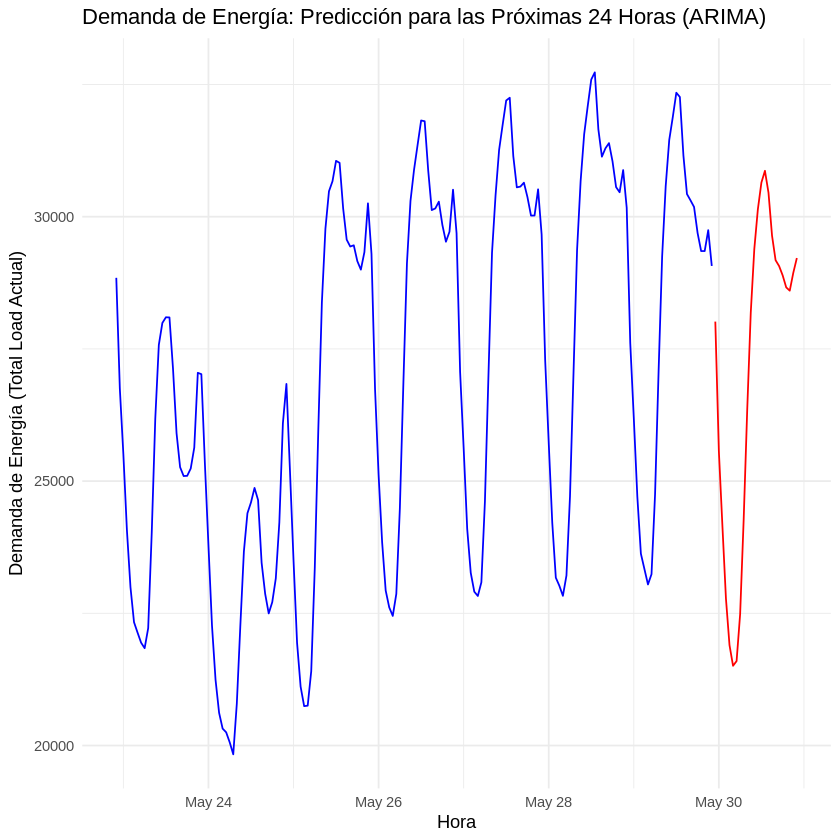

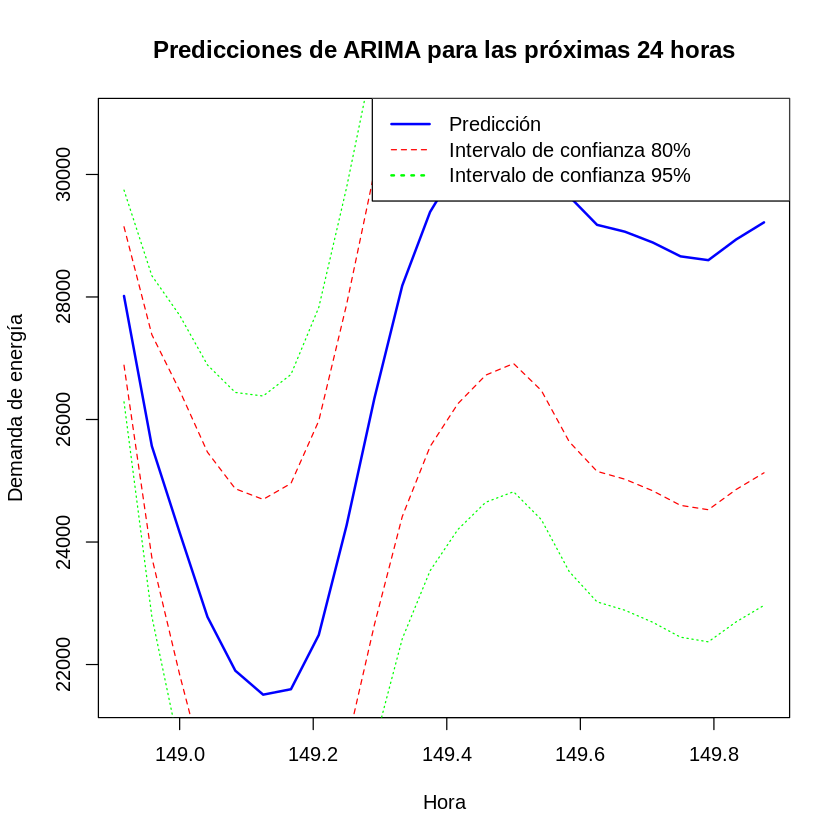

In [ ]:
# ADVERTENCIA: Si va ejecutarlo en el Colab, cambie el Ambiente de Ejecución para R
# Instalar las librerías necesarias (si no están instaladas)
install.packages(c("forecast", "prophet", "dplyr"))

# Librerías necesarias
library(forecast)
library(ggplot2)
library(readr)

# Leer y preparar los datos desde la URL
url1 <- "https://raw.githubusercontent.com/vneumannufprbr/TrabajosRStudio/main/energy_dataset.csv" # Dataset con 3.500 instancias
data<- read.csv(url1, stringsAsFactors = FALSE)

#url <-  "https://raw.githubusercontent.com/vneumannufprbr/Series-Temporales/main/energy_dataset.csv" # Dataset con 35.000 instancias
#data <- read.csv(url) # Dataset con 35.000 instancias # dtype=dtype_dict,

# Leer los datos desde el computador
# data <- read.csv("Practica-Prediccion-Series-Temporales/energy_dataset.csv")

# Convertir la columna de tiempo al formato adecuado
data$time <- as.POSIXct(data$time, format="%Y-%m-%d %H:%M:%S", tz="UTC")

# Seleccionar la columna 'total load actual'
data <- data[, c("time", "total.load.actual")]

# Eliminar filas con valores nulos
data <- na.omit(data)

# Convertir la columna de demanda a una serie temporal (asumimos frecuencia de datos por hora)
ts_data <- ts(data$total.load.actual, frequency = 24)  # 24 observaciones diarias

# Ajustar el modelo ARIMA a la serie temporal
fit <- auto.arima(ts_data)

# Hacer predicciones para las próximas 24 horas
forecasted <- forecast(fit, h = 24)

# Crear dataframe para graficar
df_forecast <- data.frame(
  time = seq(max(data$time) + 3600, by = "hour", length.out = 24),
  total.load.actual = as.numeric(forecasted$mean)
)

# Graficar los últimos 7 días de datos históricos y las predicciones para las próximas 24 horas
ggplot() +
  geom_line(data = tail(data, 7*24), aes(x = time, y = total.load.actual), color = "blue") +  # Últimos 7 días de datos históricos
  geom_line(data = df_forecast, aes(x = time, y = total.load.actual), color = "red") +  # Predicciones de 24 horas
  labs(title = "Demanda de Energía: Predicción para las Próximas 24 Horas (ARIMA)",
       x = "Hora", y = "Demanda de Energía (Total Load Actual)") +
  theme_minimal()


# Visualizar las predicciones para las próximas 24 horas con Intervalo de confianza
plot(forecasted$mean, type = "l", col = "blue", lwd = 2,
     xlab = "Hora", ylab = "Demanda de energía",
     main = "Predicciones de ARIMA para las próximas 24 horas")
lines(forecasted$lower[, 1], col = "red", lty = 2)
lines(forecasted$upper[, 1], col = "red", lty = 2)
lines(forecasted$lower[, 2], col = "green", lty = 3)
lines(forecasted$upper[, 2], col = "green", lty = 3)
legend("topright", legend = c("Predicción", "Intervalo de confianza 80%","Intervalo de confianza 95%"),
       col = c("blue", "red","green"), lty = c(1, 2, 3), lwd = c(2, 1))



Cálculo de métricas de desempenho

In [ ]:
# Instalar y cargar la librería 'Metrics' si no está instalada
if (!requireNamespace("Metrics", quietly = TRUE)) {
  install.packages("Metrics")
}
library(Metrics)

# Asegurarse de que los datos históricos y las predicciones tengan la misma longitud y alineación temporal para la evaluación
# Para este ejemplo, evaluaremos las predicciones contra los últimos 24 puntos de datos históricos
# En un escenario real, se necesita un conjunto de datos de prueba separado
historical_actual <- tail(data$total.load.actual, 24)
forecasted_values <- as.numeric(forecasted$mean)

# Verificar que las longitudes coincidan
if (length(historical_actual) == length(forecasted_values)) {
  # Calcular las métricas de evaluación
  rmse_value <- rmse(historical_actual, forecasted_values)
  mse_value <- mse(historical_actual, forecasted_values)
  mae_value <- mae(historical_actual, forecasted_values)
  # Para R2, necesitamos el modelo original o calcularlo manualmente
  # Una forma simple es usar la correlación al cuadrado entre los valores reales y predichos
  r2_value <- cor(historical_actual, forecasted_values)^2

  # Imprimir los resultados
  cat("Métricas de Evaluación:\n")
  cat("RMSE:", rmse_value, "\n")
  cat("MSE:", mse_value, "\n")
  cat("MAE:", mae_value, "\n")
  cat("R2:", r2_value, "\n")
} else {
  cat("Error: Las longitudes de los datos históricos y las predicciones no coinciden para la evaluación.\n")
  cat("Longitud de datos históricos:", length(historical_actual), "\n")
  cat("Longitud de predicciones:", length(forecasted_values), "\n")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




Métricas de Evaluación:
RMSE: 1708.306 
MSE: 2918311 
MAE: 1553.126 
R2: 0.9472034 


1. RMSE (Root Mean Squared Error) = 1708.306: Esta métrica mide la desviación
estándar de los errores de predicción. En términos simples, indica cuánto se desvían las predicciones de los valores reales en promedio. Un RMSE más bajo generalmente significa un mejor ajuste del modelo a los datos. Un valor de 1708.306 sugiere que, en promedio, tus predicciones de carga de energía se desvían en aproximadamente 1708.306 unidades de los valores reales. La escala de este valor debe considerarse en relación con la escala de tus datos de "total load actual".
2. MSE (Mean Squared Error) = 2918311: Esta es la media de los errores al cuadrado. Es similar al RMSE, pero al elevar al cuadrado los errores, penaliza más los errores grandes. Un MSE más bajo indica un mejor rendimiento del modelo. El valor de 2918311 es el promedio de las diferencias al cuadrado entre los valores reales y predichos.
3. MAE (Mean Absolute Error) = 1553.126: Esta métrica mide la magnitud promedio de los errores en un conjunto de predicciones, sin considerar su dirección. Es la media de los valores absolutos de los errores. A diferencia del MSE y RMSE, el  MAE no penaliza los errores grandes de manera desproporcionada. Un MAE de 1553.126 significa que, en promedio, las predicciones difieren de los valores reales en 1553.126 unidades.
4. R2 (R-squared) = 0.9472034: También conocido como coeficiente de determinación, el R2 representa la proporción de la varianza en la variable dependiente (la carga de energía real) que es predecible a partir de la variable independiente (las predicciones del modelo). Un valor de R2 cercano a 1 indica que el modelo explica una gran proporción de la variabilidad de los datos. Un R2 de 0.9472 sugiere que tu modelo ARIMA explica aproximadamente el 94.72% de la variabilidad en la carga de energía real, lo cual es un valor bastante alto e indica que el modelo tiene un buen ajuste a los datos históricos utilizados para la evaluación.
5. En resumen, los valores de RMSE y MAE te dan una idea del error promedio de las predicciones, mientras que el R2 te indica qué tan bien el modelo explica la variabilidad de los datos. Un R2 de casi 0.95 es un buen indicador de que el modelo está funcionando bien para capturar la dinámica de la serie temporal, aunque siempre es importante considerar la escala de los errores (RMSE y MAE) en el contexto de los valores de tus datos.

# Task
Generar código R para realizar predicciones y calcular métricas de evaluación (R2, RMSE, MSE, MAE) utilizando el modelo Prophet, y comparar los resultados con los obtenidos previamente con un modelo ARIMA.

## Preparar los datos para prophet

### Subtask:
Asegurarse de que los datos estén en el formato requerido por Prophet, que es un dataframe con columnas `ds` (para la marca de tiempo) y `y` (para la variable a predecir).


**Reasoning**:
Create a new dataframe with the required column names 'ds' and 'y' for Prophet, ensuring the 'ds' column is in datetime format and 'y' is numeric.



In [ ]:
# Crear un nuevo dataframe para Prophet
prophet_data <- data.frame(
  ds = data$time,
  y = data$total.load.actual
)

# Asegurarse de que 'ds' sea de tipo POSIXct (ya se hizo al leer los datos, pero se confirma)
prophet_data$ds <- as.POSIXct(prophet_data$ds, tz = "UTC")

# Asegurarse de que 'y' sea numérica (ya se hizo al leer los datos, pero se confirma)
prophet_data$y <- as.numeric(prophet_data$y)

# Mostrar las primeras filas del nuevo dataframe
head(prophet_data)

,ds,y
,<dttm>,<dbl>
1,2015-01-01 00:00:00,25385
2,2015-01-01 01:00:00,24382
3,2015-01-01 02:00:00,22734
4,2015-01-01 03:00:00,21286
5,2015-01-01 04:00:00,20264
6,2015-01-01 05:00:00,19905


## Instalar y cargar la librería prophet

### Subtask:
Asegurarse de que la librería Prophet esté instalada y cargada en el entorno R.


**Reasoning**:
Check if the 'prophet' package is installed and install it if necessary, then load the library.



In [ ]:
# Verificar si el paquete 'prophet' está instalado y cargarlo
if (!requireNamespace("prophet", quietly = TRUE)) {
  install.packages("prophet")
}
library(prophet)

Loading required package: Rcpp

Loading required package: rlang


Attaching package: ‘rlang’


The following object is masked from ‘package:Metrics’:

    ll




## Ajustar el modelo prophet

### Subtask:
Entrenar el modelo Prophet con los datos históricos preparados.


**Reasoning**:
Instantiate and fit the Prophet model to the prepared data.



In [ ]:
# Instanciar el modelo Prophet
model_prophet <- prophet()

# Ajustar el modelo a los datos preparados
model_prophet <- fit(model_prophet, prophet_data)

ERROR: Error in fit(model_prophet, prophet_data): could not find function "fit"


In [ ]:
# Instanciar el modelo Prophet
model_prophet <- prophet::prophet()

# Ajustar el modelo a los datos preparados
model_prophet <- prophet::fit(model_prophet, prophet_data)

ERROR: Error: 'fit' is not an exported object from 'namespace:prophet'


**Reasoning**:
The error indicates that `fit` is not an exported function from the `prophet` package in R. The correct function to train the model in R's prophet package is `prophet()`, which takes the data as an argument during instantiation. I will correct the code to use the proper function call.



In [ ]:
# Instanciar y ajustar el modelo Prophet a los datos preparados
model_prophet <- prophet::prophet(prophet_data)

Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.



## Realizar predicciones con Prophet

### Subtask:
Generar predicciones para el mismo período que se usó para evaluar el modelo ARIMA.

**Reasoning**:
Create a dataframe of future dates for the forecast and then generate predictions using the fitted Prophet model.

In [ ]:
# Crear un dataframe con las fechas futuras para las predicciones
# Usaremos el mismo período que para el modelo ARIMA (las próximas 24 horas)
future <- make_future_dataframe(model_prophet, periods = 24, freq = 'hour')

# Realizar las predicciones
forecast_prophet <- predict(model_prophet, future)

# Mostrar las primeras filas de las predicciones
head(forecast_prophet)

,ds,trend,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_lower,yhat_upper,trend_lower,trend_upper,yhat
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-01-01 00:00:00,25359.07,-1872.487,-1872.487,-1872.487,-2408.824,-2408.824,-2408.824,536.3371,536.3371,536.3371,0,0,0,19984.34,26608.08,25359.07,25359.07,23486.59
2,2015-01-01 01:00:00,25374.74,-3646.097,-3646.097,-3646.097,-4178.831,-4178.831,-4178.831,532.7336,532.7336,532.7336,0,0,0,18308.48,25375.85,25374.74,25374.74,21728.64
3,2015-01-01 02:00:00,25390.40,-4842.763,-4842.763,-4842.763,-5371.587,-5371.587,-5371.587,528.8234,528.8234,528.8234,0,0,0,17165.06,24035.55,25390.40,25390.40,20547.63
4,2015-01-01 03:00:00,25406.06,-5531.205,-5531.205,-5531.205,-6055.999,-6055.999,-6055.999,524.7942,524.7942,524.7942,0,0,0,16086.53,23272.74,25406.06,25406.06,19874.85
5,2015-01-01 04:00:00,25421.72,-5669.805,-5669.805,-5669.805,-6190.656,-6190.656,-6190.656,520.8508,520.8508,520.8508,0,0,0,16425.11,23032.64,25421.72,25421.72,19751.91
6,2015-01-01 05:00:00,25437.38,-5053.462,-5053.462,-5053.462,-5570.673,-5570.673,-5570.673,517.2110,517.2110,517.2110,0,0,0,17074.58,23892.01,25437.38,25437.38,20383.92


## Calcular métricas de evaluación para Prophet

### Subtask:
Calcular RMSE, MSE, MAE y R2 comparando las predicciones de Prophet con los valores reales para el período de predicción.

In [ ]:
# Extraer los valores reales para el período de predicción (las últimas 24 horas de los datos históricos)
historical_actual_prophet <- tail(prophet_data$y, 24)

# Extraer los valores predichos de las predicciones de Prophet
forecasted_values_prophet <- tail(forecast_prophet$yhat, 24)

# Verificar que las longitudes coincidan
if (length(historical_actual_prophet) == length(forecasted_values_prophet)) {
  # Calcular las métricas de evaluación para Prophet
  rmse_prophet <- Metrics::rmse(historical_actual_prophet, forecasted_values_prophet)
  mse_prophet <- Metrics::mse(historical_actual_prophet, forecasted_values_prophet)
  mae_prophet <- Metrics::mae(historical_actual_prophet, forecasted_values_prophet)
  # Calcular R2 para Prophet
  r2_prophet <- cor(historical_actual_prophet, forecasted_values_prophet)^2

  # Imprimir los resultados
  cat("Métricas de Evaluación (Prophet):\n")
  cat("RMSE:", rmse_prophet, "\n")
  cat("MSE:", mse_prophet, "\n")
  cat("MAE:", mae_prophet, "\n")
  cat("R2:", r2_prophet, "\n")
} else {
  cat("Error: Las longitudes de los datos históricos y las predicciones de Prophet no coinciden para la evaluación.\n")
  cat("Longitud de datos históricos:", length(historical_actual_prophet), "\n")
  cat("Longitud de predicciones de Prophet:", length(forecasted_values_prophet), "\n")
}

Métricas de Evaluación (Prophet):
RMSE: 2292.705 
MSE: 5256498 
MAE: 2189.867 
R2: 0.943456 


## Visualizar las predicciones de Prophet

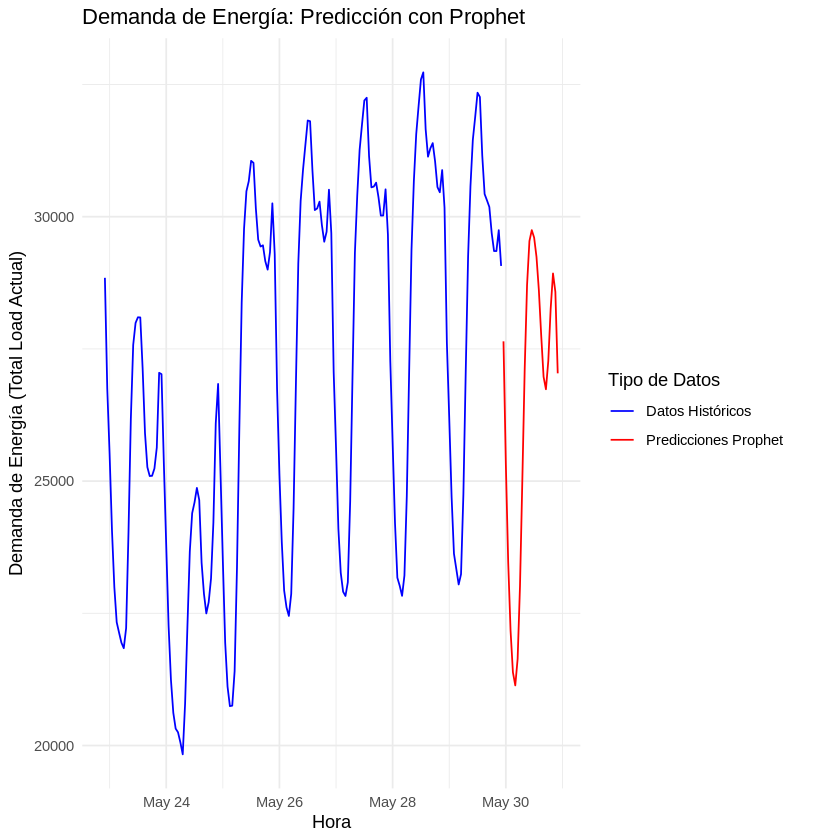

In [ ]:
# Crear un dataframe para graficar los datos históricos recientes y las predicciones de Prophet
# Incluir los últimos 7 días de datos históricos para comparación

# Seleccionar los últimos 7 días de datos históricos
historical_recent <- tail(prophet_data, 7 * 24)

# Seleccionar solo las predicciones para las próximas 24 horas (últimas 24 filas de forecast_prophet)
forecast_recent_prophet <- tail(forecast_prophet, 24) %>%
  select(ds, yhat) %>%
  rename(y = yhat) %>%
  mutate(type = "Predicciones Prophet")

# Combinar los datos históricos recientes y las predicciones
plot_data_prophet_combined <- historical_recent %>%
  mutate(type = "Datos Históricos") %>%
  bind_rows(forecast_recent_prophet)


# Graficar los últimos 7 días de datos históricos y las predicciones de Prophet
ggplot(plot_data_prophet_combined, aes(x = ds, y = y, color = type)) +
  geom_line() +
  labs(title = "Demanda de Energía: Predicción con Prophet",
       x = "Hora", y = "Demanda de Energía (Total Load Actual)",
       color = "Tipo de Datos") +
  theme_minimal() +
  scale_color_manual(values = c("Datos Históricos" = "blue", "Predicciones Prophet" = "red"))

## Comparar los resultados
Comparar las métricas de evaluación de Prophet con las de ARIMA para determinar qué modelo tuvo un mejor rendimiento.

In [ ]:
# Mostrar las métricas de evaluación para ARIMA
cat("Métricas de Evaluación (ARIMA):\n")
cat("RMSE:", rmse_value, "\n")
cat("MSE:", mse_value, "\n")
cat("MAE:", mae_value, "\n")
cat("R2:", r2_value, "\n\n")

# Mostrar las métricas de evaluación para Prophet
cat("Métricas de Evaluación (Prophet):\n")
cat("RMSE:", rmse_prophet, "\n")
cat("MSE:", mse_prophet, "\n")
cat("MAE:", mae_prophet, "\n")
cat("R2:", r2_prophet, "\n")

# Comparar los resultados
cat("\nComparación de Modelos:\n")
if (rmse_prophet < rmse_value) {
  cat("Prophet tuvo un RMSE más bajo (mejor).\n")
} else {
  cat("ARIMA tuvo un RMSE más bajo (mejor).\n")
}

if (mae_prophet < mae_value) {
  cat("Prophet tuvo un MAE más bajo (mejor).\n")
} else {
  cat("ARIMA tuvo un MAE más bajo (mejor).\n")
}

if (r2_prophet > r2_value) {
  cat("Prophet tuvo un R2 más alto (mejor).\n")
} else {
  cat("ARIMA tuvo un R2 más alto (mejor).\n")
}

Métricas de Evaluación (ARIMA):
RMSE: 1708.306 
MSE: 2918311 
MAE: 1553.126 
R2: 0.9472034 

Métricas de Evaluación (Prophet):
RMSE: 2292.705 
MSE: 5256498 
MAE: 2189.867 
R2: 0.943456 

Comparación de Modelos:
ARIMA tuvo un RMSE más bajo (mejor).
ARIMA tuvo un MAE más bajo (mejor).
ARIMA tuvo un R2 más alto (mejor).
